In [70]:
#This notebook goes through a basic round of analysis on a 
#pair of molecular trajectores, one from a reference trajectory and 
#from a model parameterized to match that data.
#
#NOTE: We use small datasets and a weak set of lightGBM 
#hyperparameters for speed--- real analyses should push harder.

In [57]:
#first, we grab data from molecular trajectories.
#Note that we a priori know that these were both
#run at 350K--- we will use that later.
#mod corresponds to the model, ref to the reference 
#data.
import numpy as np
mod_array=np.load("../data/short_mod_array.npy")
ref_array=np.load("../data/short_ref_array.npy")

In [58]:
#These are MDtraj style trajectories of coordinates. Be 
#careful if there are periodic boundary artifacts--- here 
#there are not. There are 10 particles, 100K frames.
print(mod_array.shape)
print(ref_array.shape)

(100000, 10, 3)
(100000, 10, 3)


In [59]:
#The classification analysis finds errors in the configurational
#distribution and connects them to features.
#The features we use here are global distance matrices.
#Any featurization can be used, including those not in this library.
import classE.featurization as feat
mod=feat.make_distance_table(mod_array,batch_size=50000)
ref=feat.make_distance_table(ref_array,batch_size=50000)

In [60]:
#The featurization functions just spew out data frames of features.
#(Any alternative featurization must also do so)
#Note that the name of each column is the two particle indices inbetween 
#which the distance is calculated. The index is the trajectory frame.
print(mod.head(3))

        0-1       0-2        0-3        0-4        0-5        0-6       0-7  \
0  3.893455  6.539157  10.152637  11.948099  11.069265  10.932558  8.209948   
1  3.810538  6.048540   9.746453  10.771680   9.247207   9.717348  6.523721   
2  3.802289  5.605011   9.110276  10.661925   8.778502   8.834767  5.640453   

        0-8        0-9       1-2  ...       5-6       5-7       5-8  \
0  8.203064  11.605299  3.870600  ...  3.771248  5.783793  8.043481   
1  8.018014  11.061561  3.894755  ...  3.919316  5.858102  8.166302   
2  7.199379  10.444869  3.924050  ...  3.809126  5.834629  7.932804   

         5-9       6-7       6-8       6-9       7-8       7-9       8-9  
0   9.955757  3.855731  5.180697  6.318485  3.843402  5.690681  3.777369  
1  10.389727  3.872964  5.624191  6.785212  3.907583  5.824946  3.894228  
2   8.808431  3.793598  5.396514  5.149534  3.914439  5.472809  3.905423  

[3 rows x 45 columns]


In [61]:
#Now we move to doing the actual classification analysis.
import classE.compare as cc
#the force_balance flag is not neccesary here, but it is in most applications. 
#It truncates the samples from each class if neccesary to make sure the classification 
#problem is balanced, which is critical for the method to work.
#Also note that here is where the 350K temperature information comes in.
results=cc.compare_distance_tables(mod,ref,force_balance=True,temperature=350)
#The log ouptut that is spewed is primarily lightGBM perfoming classification. 
#The stated numbers are evaluations of losses on the _validation_ set. 
#The lightgbm parameters should be modified such that the log loss and l2 
#loss are minimized. For more information on LGBM, see 
#https://lightgbm.readthedocs.io/en/latest/. 

Found `n_iter` in params. Will use it instead of argument


[LightGBM] [Info] Number of positive: 39381, number of negative: 39494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 78875, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499284 -> initscore=-0.002865
[LightGBM] [Info] Start training from score -0.002865
[1]	valid_0's binary_logloss: 0.686123	valid_0's l2: 0.24649	valid_0's binary_error: 0.385924
[2]	valid_0's binary_logloss: 0.680481	valid_0's l2: 0.243675	valid_0's binary_error: 0.368594
[3]	valid_0's binary_logloss: 0.67536	valid_0's l2: 0.241126	valid_0's binary_error: 0.362667
[4]	valid_0's binary_logloss: 0.669921	valid_0's l2: 0.238428	valid_0's binary_error: 0.360058
[5]	valid_0's binary_logloss: 0.66568	valid_0's l2: 0.236337	valid_0's binary_error: 0.356144
[6]	valid_0's binary_logloss: 

[88]	valid_0's binary_logloss: 0.598636	valid_0's l2: 0.205209	valid_0's binary_error: 0.312941
[89]	valid_0's binary_logloss: 0.599098	valid_0's l2: 0.205392	valid_0's binary_error: 0.312702
[90]	valid_0's binary_logloss: 0.599713	valid_0's l2: 0.205645	valid_0's binary_error: 0.312627
[91]	valid_0's binary_logloss: 0.600321	valid_0's l2: 0.205898	valid_0's binary_error: 0.31266
[92]	valid_0's binary_logloss: 0.599076	valid_0's l2: 0.205379	valid_0's binary_error: 0.312008
[93]	valid_0's binary_logloss: 0.598119	valid_0's l2: 0.204983	valid_0's binary_error: 0.311942
[94]	valid_0's binary_logloss: 0.598716	valid_0's l2: 0.205222	valid_0's binary_error: 0.311884
[95]	valid_0's binary_logloss: 0.59923	valid_0's l2: 0.205437	valid_0's binary_error: 0.311983
[96]	valid_0's binary_logloss: 0.599688	valid_0's l2: 0.205625	valid_0's binary_error: 0.311909
[97]	valid_0's binary_logloss: 0.598858	valid_0's l2: 0.205277	valid_0's binary_error: 0.310993
[98]	valid_0's binary_logloss: 0.599402	va

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [62]:
#`results` has the analysis results in dictionary form. `shaper` is only useful 
#when doing collective variable analysis, which we do not do in this notebook.
results.keys()

dict_keys(['table', 'feature_names', 'shap_names', 'other_names', 'shaper'])

In [63]:
#`table` is a data frame with all the data results. It has the original features,
#the error (delta_u) shap decompositions of delta_u, and more direct information
#about the classification.
df=results['table']
print("original table: ",df.columns)

original table:  Index(['0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '0-7', '0-8', '0-9', '1-2',
       '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9', '2-3', '2-4', '2-5',
       '2-6', '2-7', '2-8', '2-9', '3-4', '3-5', '3-6', '3-7', '3-8', '3-9',
       '4-5', '4-6', '4-7', '4-8', '4-9', '5-6', '5-7', '5-8', '5-9', '6-7',
       '6-8', '6-9', '7-8', '7-9', '8-9', 'fake_label', 'in_train',
       'tree_output', 's-0-1', 's-0-2', 's-0-3', 's-0-4', 's-0-5', 's-0-6',
       's-0-7', 's-0-8', 's-0-9', 's-1-2', 's-1-3', 's-1-4', 's-1-5', 's-1-6',
       's-1-7', 's-1-8', 's-1-9', 's-2-3', 's-2-4', 's-2-5', 's-2-6', 's-2-7',
       's-2-8', 's-2-9', 's-3-4', 's-3-5', 's-3-6', 's-3-7', 's-3-8', 's-3-9',
       's-4-5', 's-4-6', 's-4-7', 's-4-8', 's-4-9', 's-5-6', 's-5-7', 's-5-8',
       's-5-9', 's-6-7', 's-6-8', 's-6-9', 's-7-8', 's-7-9', 's-8-9',
       'delta_u'],
      dtype='object')


In [64]:
#results also has lists of colunmns which correspond to particular subsets of info
#e.g., 'shap_names' isolates only the shap decomposition columns
cols=results['shap_names']
#the shap columns are like the features, but prefixed with "s-"
print("\n only shap values table",df.loc[:,cols].head(1))


 only shap values table      s-0-1         s-0-2         s-0-3         s-0-4         s-0-5  \
0 0    0.0 -5.897629e-24  3.036844e-22  9.868034e-24 -2.105144e-22   

            s-0-6         s-0-7         s-0-8         s-0-9  s-1-2  ...  \
0 0  3.272499e-23  1.823057e-24  9.742051e-23 -1.496569e-23    0.0  ...   

     s-5-6         s-5-7         s-5-8         s-5-9  s-6-7         s-6-8  \
0 0    0.0  2.498535e-22 -1.067156e-22 -1.266766e-23    0.0  1.999415e-22   

            s-6-9  s-7-8  s-7-9  s-8-9  
0 0  1.113231e-22    0.0    0.0    0.0  

[1 rows x 45 columns]


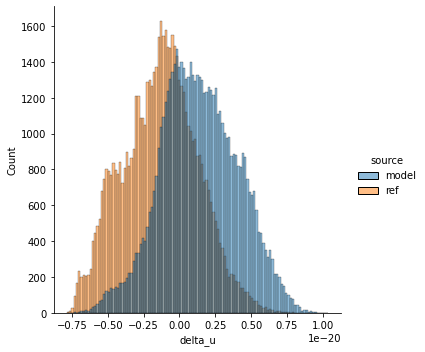

In [65]:
#The primary error quantification is in delta_u, which we can plot
import seaborn as sns
import matplotlib.pyplot as plt
#take information in index and make it more readable
dfr=df.reset_index()
dfr['source']='model'
mask=dfr['level_0']==1
dfr.loc[mask,'source']='ref'
#isolate and plot the recorded delta U of validation set
#(units are Joules)
mask=dfr["in_train"]==False
sns.displot(dfr.loc[mask,:],x="delta_u",hue="source")
plt.show()
#Note that delta_u is a valid collective variable in itself--- separation on
#its 1-D marginal distribution matches that in the full dim phase space
#assuming perfect classification. In other words, no feature is going to get 
#us better separation.

In [66]:
#we can summarize the shap values over the entire trajectory
#this call gives the mean of the abs value for the shaps of each feature
summary=cc.summarize_shap_table(results['table'],results['shap_names'])
summary.head()

s-0-1    0.000000e+00
s-0-2    1.125713e-23
s-0-3    1.268374e-22
s-0-4    2.373822e-23
s-0-5    1.311877e-22
dtype: float64

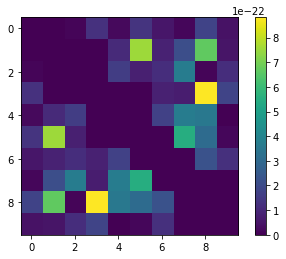

In [67]:
#This can be more easily visualized in matrix form, so we quickly scrape 
#and reshape
import re
#Here we cheat a little bit--- we know that there are 10 particles 
mat=np.zeros((10,10))
#Then we stick the information in the matrix
for lab,val in summary.iteritems():
    ind1,ind2 = [int(x) for x in re.findall(r'\d+',lab)]
    mat[ind1,ind2] = val
    mat[ind2,ind1] = val
plt.imshow(mat)
plt.colorbar()
plt.show()

In [68]:
#There are a few outlying high values, which we can grab from the Series
summary.sort_values(ascending=False).head(5)

s-3-8    8.820222e-22
s-1-5    7.514895e-22
s-1-8    6.681860e-22
s-5-7    5.511040e-22
s-2-7    3.713651e-22
dtype: float64

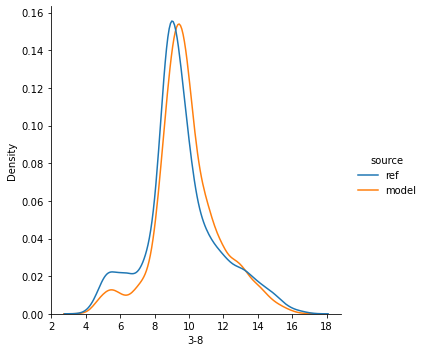

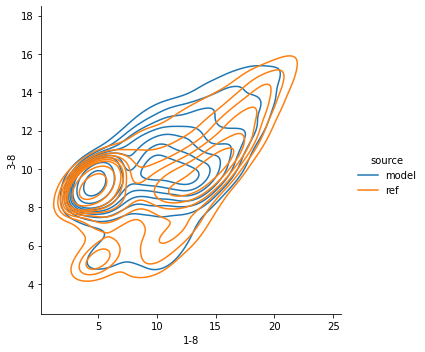

In [69]:
#We can use that information to look at marginals
sns.displot(dfr.loc[mask,:].sample(int(1e4)),x="3-8",hue="source",kind="kde")
sns.displot(dfr.loc[mask,:].sample(int(1e4)),x="1-8",y="3-8",hue="source",kind="kde")
plt.show()
#As implied in the delta_u plot, these marginals have _pretty_ good overlap. They're
#leading candidates for the worst distances, though.